In [54]:
import numpy as np
import pandas as pd

In [55]:
data_raw = pd.read_parquet("vhrdata").drop_duplicates(subset=None, keep='last', inplace=False)
drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672419 entries, 0 to 1672418
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vin                       1672419 non-null  object 
 1   collect_ts                1672419 non-null  int64  
 2   uuid                      1672419 non-null  object 
 3   model_name                1672419 non-null  object 
 4   series_code               1672419 non-null  object 
 5   msg_create_time           1672419 non-null  object 
 6   vcu_VehicleMode           1670933 non-null  float32
 7   vcu_vehicleSpeed          1670936 non-null  float32
 8   VCU_VehicleSpeedValid     1670936 non-null  float32
 9   vcu_state                 1672019 non-null  float32
 10  bms_SOC                   1668674 non-null  float32
 11  bms_state                 1672419 non-null  float32
 12  BCM_ebs_U_BATT            166432 non-null   float32
 13  BCM_ebs_SOC               1

In [ ]:
data_raw.head(20)

In [56]:
# 填充操作
#data= data_raw[data_raw.vin == 'LM8F7D792NA012370'].fillna(method='bfill').sort_values(by="collect_ts")
data= data_raw
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672419 entries, 0 to 1672418
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vin                       1672419 non-null  object 
 1   collect_ts                1672419 non-null  int64  
 2   uuid                      1672419 non-null  object 
 3   model_name                1672419 non-null  object 
 4   series_code               1672419 non-null  object 
 5   msg_create_time           1672419 non-null  object 
 6   vcu_VehicleMode           1670933 non-null  float32
 7   vcu_vehicleSpeed          1670936 non-null  float32
 8   VCU_VehicleSpeedValid     1670936 non-null  float32
 9   vcu_state                 1672019 non-null  float32
 10  bms_SOC                   1668674 non-null  float32
 11  bms_state                 1672419 non-null  float32
 12  BCM_ebs_U_BATT            166432 non-null   float32
 13  BCM_ebs_SOC               1

In [ ]:
data = data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 18.)]
data.info()

In [ ]:
pd.DataFrame(data["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')

In [ ]:
import matplotlib.pyplot as plt
data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 11.)].BCM_ebs_U_BATT.hist(bins=12, figsize=(5,3))
plt.show()

In [ ]:
data_copy = data.copy()

data_copy['date'] = pd.to_datetime(data_copy["collect_ts"], unit='ms')

data_copy = data_copy.set_index("date")
data_copy

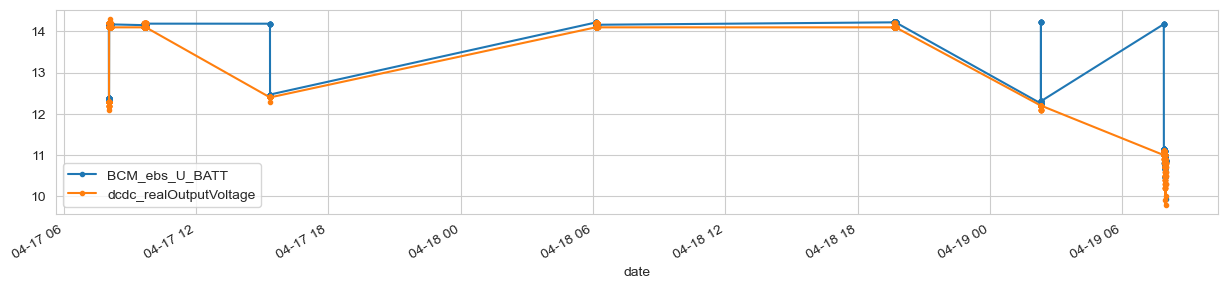

In [57]:
import matplotlib.pyplot as plt

data_copy["2023-04-16 05:00:00":"2023-04-19 21:00:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

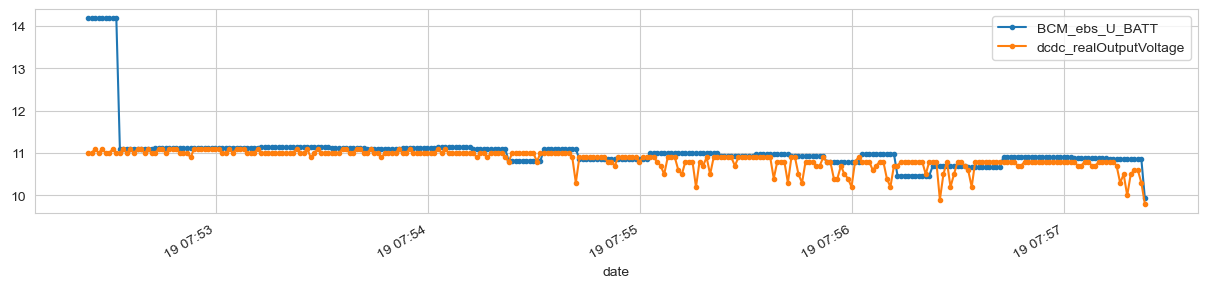

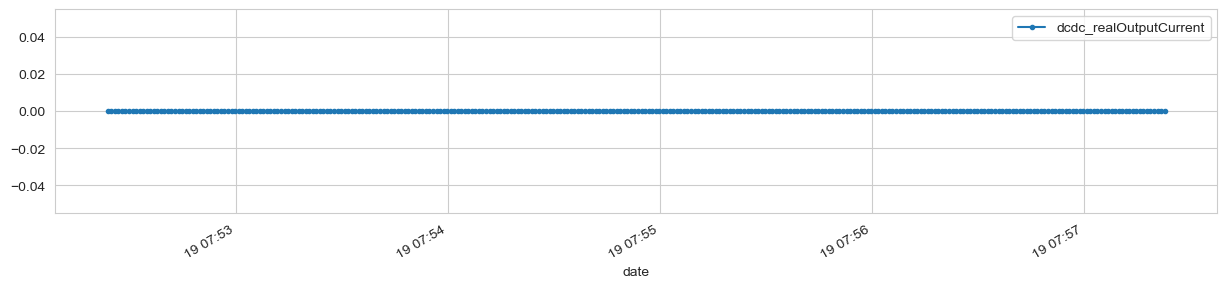

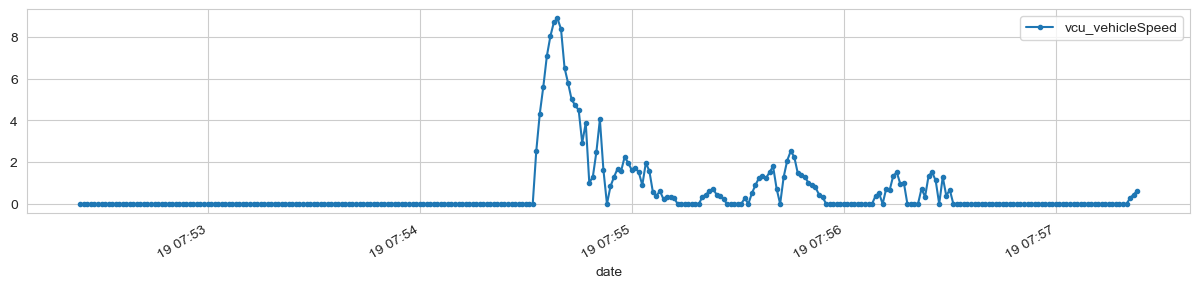

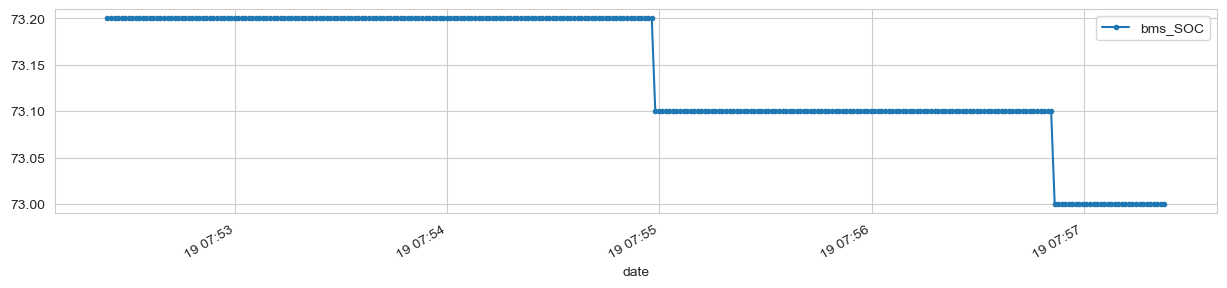

In [58]:
import matplotlib.pyplot as plt
data_copy["2023-04-19 07:50:00":"2023-04-20 00:00:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-19 07:50:00":"2023-04-20 00:00:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-19 07:50:00":"2023-04-20 00:00:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-19 07:50:00":"2023-04-20 00:00:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
# extra code – saves the figure for the book
plt.show()